# Keras TF 2.0 - Code Along Classification Project

Let's explore a classification task with Keras API for TF 2.0

## The Data

### Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 3 is Mean Radius, field
        13 is Radius SE, field 23 is Worst Radius.

        - class:
                - WDBC-Malignant
                - WDBC-Benign

    :Summary Statistics:

    ===================================== ====== ======
                                           Min    Max
    ===================================== ====== ======
    radius (mean):                        6.981  28.11
    texture (mean):                       9.71   39.28
    perimeter (mean):                     43.79  188.5
    area (mean):                          143.5  2501.0
    smoothness (mean):                    0.053  0.163
    compactness (mean):                   0.019  0.345
    concavity (mean):                     0.0    0.427
    concave points (mean):                0.0    0.201
    symmetry (mean):                      0.106  0.304
    fractal dimension (mean):             0.05   0.097
    radius (standard error):              0.112  2.873
    texture (standard error):             0.36   4.885
    perimeter (standard error):           0.757  21.98
    area (standard error):                6.802  542.2
    smoothness (standard error):          0.002  0.031
    compactness (standard error):         0.002  0.135
    concavity (standard error):           0.0    0.396
    concave points (standard error):      0.0    0.053
    symmetry (standard error):            0.008  0.079
    fractal dimension (standard error):   0.001  0.03
    radius (worst):                       7.93   36.04
    texture (worst):                      12.02  49.54
    perimeter (worst):                    50.41  251.2
    area (worst):                         185.2  4254.0
    smoothness (worst):                   0.071  0.223
    compactness (worst):                  0.027  1.058
    concavity (worst):                    0.0    1.252
    concave points (worst):               0.0    0.291
    symmetry (worst):                     0.156  0.664
    fractal dimension (worst):            0.055  0.208
    ===================================== ====== ======

    :Missing Attribute Values: None

    :Class Distribution: 212 - Malignant, 357 - Benign

    :Creator:  Dr. William H. Wolberg, W. Nick Street, Olvi L. Mangasarian

    :Donor: Nick Street

    :Date: November, 1995

This is a copy of UCI ML Breast Cancer Wisconsin (Diagnostic) datasets.
https://goo.gl/U2Uwz2

Features are computed from a digitized image of a fine needle
aspirate (FNA) of a breast mass.  They describe
characteristics of the cell nuclei present in the image.

Separating plane described above was obtained using
Multisurface Method-Tree (MSM-T) [K. P. Bennett, "Decision Tree
Construction Via Linear Programming." Proceedings of the 4th
Midwest Artificial Intelligence and Cognitive Science Society,
pp. 97-101, 1992], a classification method which uses linear
programming to construct a decision tree.  Relevant features
were selected using an exhaustive search in the space of 1-4
features and 1-3 separating planes.

The actual linear program used to obtain the separating plane
in the 3-dimensional space is that described in:
[K. P. Bennett and O. L. Mangasarian: "Robust Linear
Programming Discrimination of Two Linearly Inseparable Sets",
Optimization Methods and Software 1, 1992, 23-34].

This database is also available through the UW CS ftp server:

ftp ftp.cs.wisc.edu
cd math-prog/cpo-dataset/machine-learn/WDBC/

.. topic:: References

   - W.N. Street, W.H. Wolberg and O.L. Mangasarian. Nuclear feature extraction 
     for breast tumor diagnosis. IS&T/SPIE 1993 International Symposium on 
     Electronic Imaging: Science and Technology, volume 1905, pages 861-870,
     San Jose, CA, 1993.
   - O.L. Mangasarian, W.N. Street and W.H. Wolberg. Breast cancer diagnosis and 
     prognosis via linear programming. Operations Research, 43(4), pages 570-577, 
     July-August 1995.
   - W.H. Wolberg, W.N. Street, and O.L. Mangasarian. Machine learning techniques
     to diagnose breast cancer from fine-needle aspirates. Cancer Letters 77 (1994) 
     163-171.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('../DATA/cancer_classification.csv')

# EDA

In [5]:
#No Null values
df.info()
df.describe().transpose()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

,count,mean,std,min,25%,50%,75%,max
mean radius,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
mean texture,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
mean perimeter,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
mean area,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
mean smoothness,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
mean compactness,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
mean concavity,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680
mean concave points,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120
mean symmetry,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400
mean fractal dimension,569.0,0.062798,0.007060,0.049960,0.057700,0.061540,0.066120,0.09744


<Axes: xlabel='benign_0__mal_1', ylabel='count'>

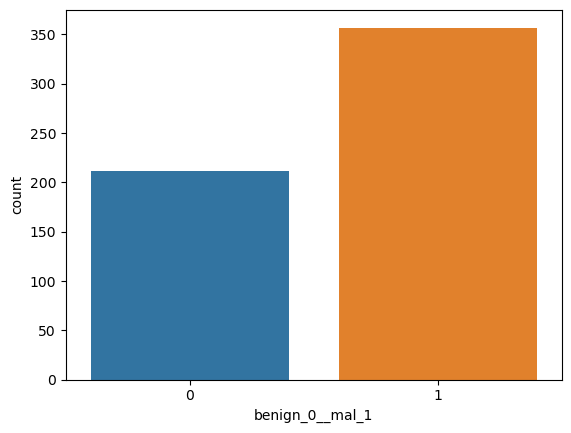

In [6]:
# The data seems quite balanced. The difference in cases is not extreme
sns.countplot(x='benign_0__mal_1', data=df)

<Axes: >

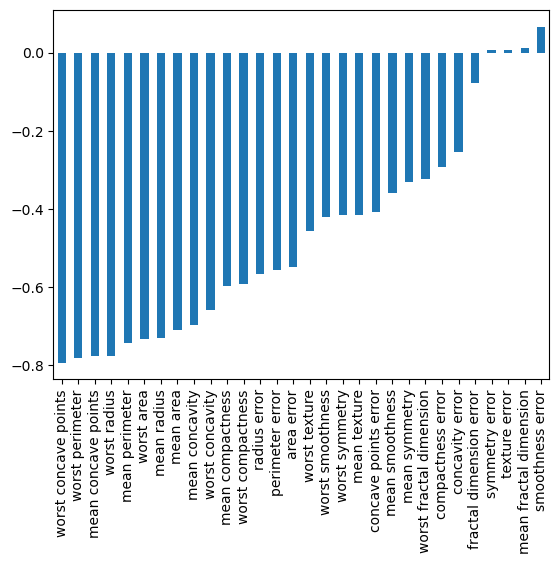

In [12]:
# Correlation of the values with our target value. (excluding the target value)
df.corr()['benign_0__mal_1'][:-1].sort_values().plot(kind='bar')

<Axes: >

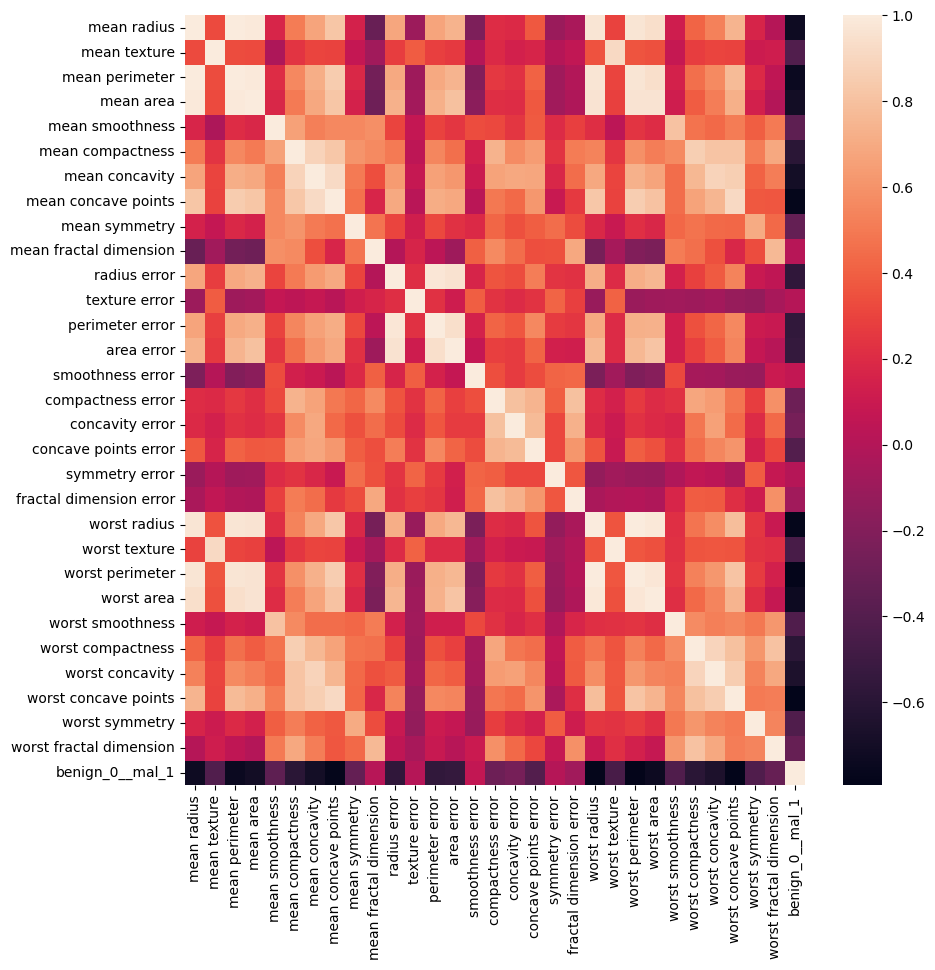

In [15]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr())

# Creating Model

In [16]:
X = df.drop('benign_0__mal_1',axis=1).values
y = df['benign_0__mal_1'].values

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=101)

### Scaling Data

In [19]:
from sklearn.preprocessing import MinMaxScaler

In [20]:
scaler = MinMaxScaler()

In [22]:
X_train = scaler.fit_transform(X_train)

In [23]:
X_test = scaler.transform(X_test)

In [57]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [27]:
X_train.shape

(426, 30)

### Model 1

In [28]:
model = Sequential()

model.add(Dense(30, activation='relu'))
model.add(Dense(15, activation='relu'))

#BINARY Classification
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam')

2023-06-25 10:34:58.765385: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [29]:
model.fit(x=X_train, y=y_train, epochs=600,validation_data=(X_test,y_test))

Epoch 1/600
14/14 [==============================] - 0s 11ms/step - loss: 0.6655 - val_loss: 0.6369
Epoch 2/600
14/14 [==============================] - 0s 3ms/step - loss: 0.6297 - val_loss: 0.6106
Epoch 3/600
14/14 [==============================] - 0s 3ms/step - loss: 0.6016 - val_loss: 0.5814
Epoch 4/600
14/14 [==============================] - 0s 3ms/step - loss: 0.5715 - val_loss: 0.5473
Epoch 5/600
14/14 [==============================] - 0s 3ms/step - loss: 0.5319 - val_loss: 0.5029
Epoch 6/600
14/14 [==============================] - 0s 3ms/step - loss: 0.4861 - val_loss: 0.4536
Epoch 7/600
14/14 [==============================] - 0s 3ms/step - loss: 0.4376 - val_loss: 0.4068
Epoch 8/600
14/14 [==============================] - 0s 3ms/step - loss: 0.3930 - val_loss: 0.3638
Epoch 9/600
14/14 [==============================] - 0s 3ms/step - loss: 0.3531 - val_loss: 0.3242
Epoch 10/600
14/14 [==============================] - 0s 3ms/step - loss: 0.3191 - val_loss: 0.2912
Epoch 11

In [30]:
model.history.history

{'loss': [0.665450930595398,
  0.6296582818031311,
  0.6016122102737427,
  0.5715340375900269,
  0.5319172143936157,
  0.48607054352760315,
  0.43764781951904297,
  0.39297962188720703,
  0.35314977169036865,
  0.3190637528896332,
  0.28828859329223633,
  0.26362305879592896,
  0.24185515940189362,
  0.22470512986183167,
  0.20959265530109406,
  0.1971450001001358,
  0.18918637931346893,
  0.17587779462337494,
  0.1685991734266281,
  0.1609169840812683,
  0.15066111087799072,
  0.14369697868824005,
  0.13963079452514648,
  0.13251206278800964,
  0.12581060826778412,
  0.12101192027330399,
  0.11458112299442291,
  0.11169887334108353,
  0.10798852145671844,
  0.10370728373527527,
  0.10042762011289597,
  0.09891150891780853,
  0.09421459585428238,
  0.09346595406532288,
  0.09059613943099976,
  0.08915135264396667,
  0.08521199226379395,
  0.08244069665670395,
  0.08129936456680298,
  0.07938030362129211,
  0.08014748990535736,
  0.08007405698299408,
  0.07540729641914368,
  0.078529097

<Axes: >

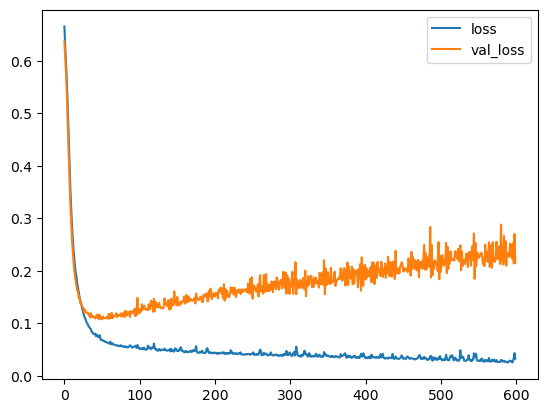

In [32]:
# We initially have overfitting on our training data set. We especially see that from the val_loss "organge line"
# We will have to use early stopping in order to stop the training and minimise the loss
losses = pd.DataFrame(model.history.history)
losses.plot()

### Model 2
Early Stopping

In [38]:
model = Sequential()

model.add(Dense(30, activation='relu'))
model.add(Dense(15, activation='relu'))

#BINARY Classification
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam')

In [39]:
from tensorflow.keras.callbacks import EarlyStopping

In [36]:
help(EarlyStopping)

Help on class EarlyStopping in module keras.callbacks:

class EarlyStopping(Callback)
 |  EarlyStopping(monitor='val_loss', min_delta=0, patience=0, verbose=0, mode='auto', baseline=None, restore_best_weights=False)
 |  
 |  Stop training when a monitored metric has stopped improving.
 |  
 |  Assuming the goal of a training is to minimize the loss. With this, the
 |  metric to be monitored would be `'loss'`, and mode would be `'min'`. A
 |  `model.fit()` training loop will check at end of every epoch whether
 |  the loss is no longer decreasing, considering the `min_delta` and
 |  `patience` if applicable. Once it's found no longer decreasing,
 |  `model.stop_training` is marked True and the training terminates.
 |  
 |  The quantity to be monitored needs to be available in `logs` dict.
 |  To make it so, pass the loss or metrics at `model.compile()`.
 |  
 |  Args:
 |    monitor: Quantity to be monitored.
 |    min_delta: Minimum change in the monitored quantity
 |        to qualify 

In [40]:
early_stop = EarlyStopping(monitor="val_loss", mode="min",verbose=1, patience=25)

In [41]:
#With early stopping, we can choose an arbitory epochs number and dont worry about it since early stopping with stop the run when monitor indicates
model.fit(x=X_train, y=y_train, epochs=600,validation_data=(X_test,y_test),callbacks=[early_stop])

Epoch 1/600
14/14 [==============================] - 0s 9ms/step - loss: 0.6627 - val_loss: 0.6406
Epoch 2/600
14/14 [==============================] - 0s 3ms/step - loss: 0.6224 - val_loss: 0.6019
Epoch 3/600
14/14 [==============================] - 0s 3ms/step - loss: 0.5832 - val_loss: 0.5620
Epoch 4/600
14/14 [==============================] - 0s 3ms/step - loss: 0.5436 - val_loss: 0.5208
Epoch 5/600
14/14 [==============================] - 0s 3ms/step - loss: 0.5017 - val_loss: 0.4770
Epoch 6/600
14/14 [==============================] - 0s 3ms/step - loss: 0.4615 - val_loss: 0.4342
Epoch 7/600
14/14 [==============================] - 0s 3ms/step - loss: 0.4205 - val_loss: 0.3932
Epoch 8/600
14/14 [==============================] - 0s 3ms/step - loss: 0.3816 - val_loss: 0.3527
Epoch 9/600
14/14 [==============================] - 0s 3ms/step - loss: 0.3464 - val_loss: 0.3189
Epoch 10/600
14/14 [==============================] - 0s 3ms/step - loss: 0.3144 - val_loss: 0.2884
Epoch 11/

<Axes: >

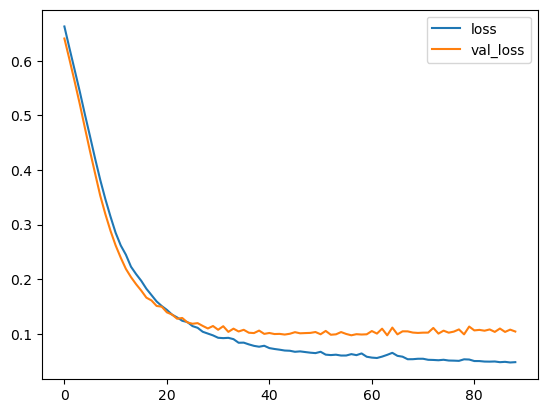

In [42]:
model_loss = pd.DataFrame(model.history.history)
model_loss.plot()

### Model 3
Dropout / Early Stopping

In [43]:
from tensorflow.keras.layers import Dropout

In [46]:
model = Sequential()

model.add(Dense(30, activation='relu'))
model.add(Dropout(rate=0.5)) #Have the neurons during each batch on this layer of 30 are going to be turned off.

model.add(Dense(15, activation='relu'))
model.add(Dropout(rate=0.5)) #Have the neurons during each batch on this layer of 15 are going to be turned off.

#BINARY Classification
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam')

In [47]:
early_stop = EarlyStopping(monitor="val_loss", mode="min",verbose=1, patience=25)

In [48]:
#With early stopping, we can choose an arbitory epochs number and dont worry about it since early stopping with stop the run when monitor indicates
# This time the model run more in comparrison with model 2 and this is because of the dropout layers
model.fit(x=X_train, y=y_train, epochs=600,validation_data=(X_test,y_test),callbacks=[early_stop])

Epoch 1/600
14/14 [==============================] - 0s 9ms/step - loss: 0.6934 - val_loss: 0.6754
Epoch 2/600
14/14 [==============================] - 0s 3ms/step - loss: 0.6838 - val_loss: 0.6524
Epoch 3/600
14/14 [==============================] - 0s 3ms/step - loss: 0.6557 - val_loss: 0.6318
Epoch 4/600
14/14 [==============================] - 0s 3ms/step - loss: 0.6290 - val_loss: 0.6093
Epoch 5/600
14/14 [==============================] - 0s 3ms/step - loss: 0.6248 - val_loss: 0.5855
Epoch 6/600
14/14 [==============================] - 0s 3ms/step - loss: 0.6055 - val_loss: 0.5609
Epoch 7/600
14/14 [==============================] - 0s 3ms/step - loss: 0.5683 - val_loss: 0.5353
Epoch 8/600
14/14 [==============================] - 0s 3ms/step - loss: 0.5646 - val_loss: 0.5038
Epoch 9/600
14/14 [==============================] - 0s 3ms/step - loss: 0.5417 - val_loss: 0.4794
Epoch 10/600
14/14 [==============================] - 0s 3ms/step - loss: 0.5292 - val_loss: 0.4546
Epoch 11/

<Axes: >

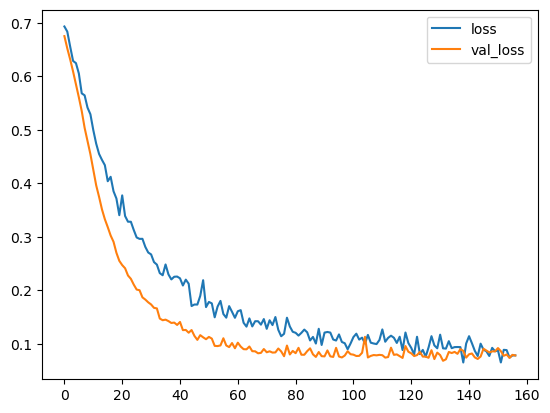

In [50]:
# This is a better behavior in comporisson to model 2 and model 1
model_loss = pd.DataFrame(model.history.history)
model_loss.plot()

## Model Evaluation

In [69]:
predictions = model.predict(X_test)
prediction_classes = [
    1 if prob > 0.5 else 0 for prob in np.ravel(predictions)
]
prediction_classes

5/5 [==============================] - 0s 3ms/step


[1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0]

In [70]:
from sklearn.metrics import classification_report, confusion_matrix

In [75]:
print(confusion_matrix(y_test, prediction_classes))

[[54  1]
 [ 4 84]]


In [74]:
print(classification_report(y_test, prediction_classes))

              precision    recall  f1-score   support

           0       0.93      0.98      0.96        55
           1       0.99      0.95      0.97        88

    accuracy                           0.97       143
   macro avg       0.96      0.97      0.96       143
weighted avg       0.97      0.97      0.97       143



# Make Predictions

In [77]:
single_case = df.drop('benign_0__mal_1',axis=1).iloc[50]

In [81]:
single_case = scaler.transform(single_case.values.reshape(-1,30))

In [85]:
#model.predict(single_case)

predictions = model.predict(single_case)
prediction_classes = [
    1 if prob > 0.5 else 0 for prob in np.ravel(predictions)
]
prediction_classes

1/1 [==============================] - 0s 21ms/step


[1]

In [88]:
df['benign_0__mal_1'].iloc[50]

1

The model predicted correctly the case!